# Credit Card Default Classification Project

## 📝 Problem Statement

Lifeline Creditors is a company that has faced numerous losses due to credit card customers defaulting on their payments during the last financial year.In order to cut losses, the company has opted to reduce the quantity of high risk loans. You are tasked with developing a machine learning algorithm tha clasiffies credit card borrowers to find the ones that are most likely to default on payment the next month. This project aims to build a machine learning model to classify whether a customer will default on their credit card payment next month using UCI Loan Data a case sstudy of Taiwan. This prediction can guide risk assessment and help banks minimize financial risk.

**Stakeholders:**
- Credit Risk Managers
- Loan Approval Officers
- Data Analysts
- Executives of Lifeline Creditors


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load and Explore Dataset
We start by importing the dataset and checking the structure. This helps us understand what features are available and whether any data cleaning is required.

In [55]:
df = pd.read_csv("UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [57]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [58]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [59]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

### 🎯 Step 2: Target Variable Preparation

Identify and rename the target column for clarity and visualize the balance between defaulters and non-defaulters. This helps assess class imbalance, which can affect model performance.


In [60]:

print(df['default.payment.next.month'].value_counts())

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


In [61]:
df.rename(columns={'default.payment.next.month': 'defaulted'}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Step 3: Exploratory Data Analysis

Visualize the relationships between important numeric variables (`LIMIT_BAL` and `AGE`) and the target. This helps detect patterns or distributions that may be predictive. We do this to check if the class is imbalanced


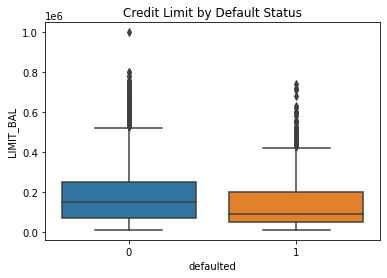

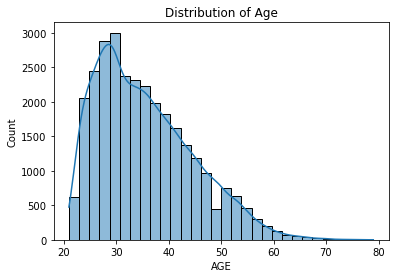

In [62]:
# Credit limit vs default
sns.boxplot(data=df, x='defaulted', y='LIMIT_BAL')
plt.title('Credit Limit by Default Status')
plt.show()

# Age distribution
sns.histplot(df['AGE'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.show()

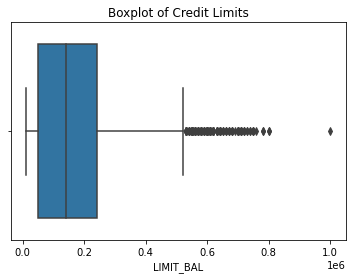

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['LIMIT_BAL'])
plt.title("Boxplot of Credit Limits")
plt.show()


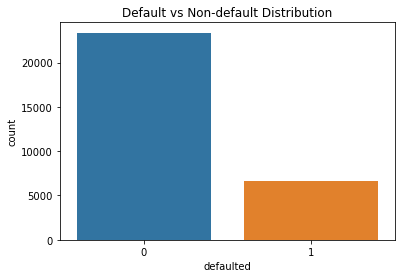

In [64]:
#Visualize the "defaulted" class o check if it is imbalanced
sns.countplot(data=df, x='defaulted')
plt.title('Default vs Non-default Distribution')
plt.show()

The class seems to be imbalaced. We initialize SMOTE which will create synthetic data points in the minority class in order to oversample it

In [65]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X = df.drop("defaulted", axis=1)
y = df["defaulted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
# Check the class count after SMOTE

from collections import Counter
print("Original:", Counter(y_train))
print("After SMOTE:", Counter(y_train_sm))

Original: Counter({0: 18691, 1: 5309})
After SMOTE: Counter({0: 18691, 1: 18691})


###  Step 4: Data Cleaning

After doing EDA we have concluded that the data does not have null values and duplicates. Therefore, we remove unnecessary columns ('ID'). We also prepare for encoding categorical variables in the next step.

In [66]:
# Drop irrelevant columns
df.drop(columns=['ID'], inplace=True)

### 🔡 Step 5: Encode Categorical Variables

Convert the categorical columns (`SEX`, `EDUCATION`, `MARRIAGE`) into dummy variables using one-hot encoding then drop the first category to prevent multicollinearity. This prepares the model for log regression.


In [67]:
#One hot encode categorical columns
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


### Step 6: Logistic Regression Model

Train a logistic regression model to classify whether a customer will default. This model serves as a strong and interpretable baseline.
"""

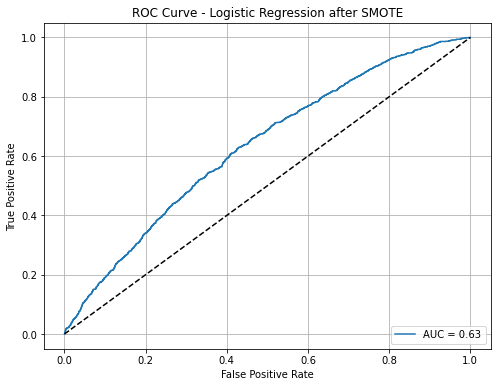

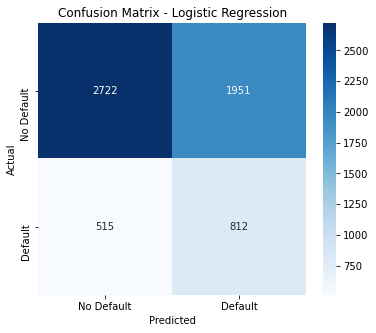

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.58      0.69      4673
           1       0.29      0.61      0.40      1327

    accuracy                           0.59      6000
   macro avg       0.57      0.60      0.54      6000
weighted avg       0.72      0.59      0.62      6000



In [73]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_sm, y_train_sm)

# Predict on test data
y_pred = logreg.predict(X_test)
y_probs = logreg.predict_proba(X_test)[:, 1]

# Step 5: AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression after SMOTE')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


## 📉 Summary
- The model is better at detecting defaulters (recall = 61%) than at correctly predicting them (precision = 29%).

- Accuracy is misleading due to class imbalance — that's why your AUC (0.63) and recall for class 1 are more important.

- Overal recall of the minority class after SMOTE is improved but there’s still a high false positive rate.

## Step 7: Change the decision threshold
In order to get a better balance between the prcision and recall, we need to tune the prediction threshold from the default of 0.5 to one that better suites our objectives.

In [80]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# probability predictions for the positive class
y_probs = logreg.predict_proba(X_test)[:, 1]
thresholds = np.arange(0.1, 0.9, 0.05)
results = []
for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    results.append((thresh, precision, recall, f1))

results_df = pd.DataFrame(results, columns=["Threshold", "Precision", "Recall", "F1"])
print(results_df)

    Threshold  Precision    Recall        F1
0        0.10   0.224778  0.993971  0.366644
1        0.15   0.227351  0.990957  0.369850
2        0.20   0.230336  0.986436  0.373466
3        0.25   0.233544  0.975885  0.376892
4        0.30   0.237997  0.960060  0.381437
5        0.35   0.245246  0.932931  0.388392
6        0.40   0.254301  0.868877  0.393448
7        0.45   0.267829  0.764130  0.396636
8        0.50   0.293883  0.611907  0.397066
9        0.55   0.324061  0.351168  0.337071
10       0.60   0.379391  0.122080  0.184721
11       0.65   0.575758  0.014318  0.027941
12       0.70   0.625000  0.003768  0.007491
13       0.75   0.666667  0.001507  0.003008
14       0.80   0.000000  0.000000  0.000000
15       0.85   0.000000  0.000000  0.000000


c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


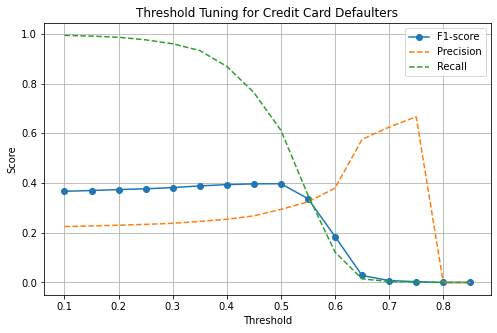

In [85]:
# Step 4 (optional): Plot F1 vs threshold
plt.figure(figsize=(8, 5))
plt.plot(results_df["Threshold"], results_df["F1"], marker='o', label='F1-score')
plt.plot(results_df["Threshold"], results_df["Precision"], linestyle='--', label='Precision')
plt.plot(results_df["Threshold"], results_df["Recall"], linestyle='--', label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning for Credit Card Defaulters")
plt.legend()
plt.grid(True)
plt.show()

In [82]:
optimal_threshold = 0.35
y_pred_final = (y_probs >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.18      0.31      4673
           1       0.25      0.93      0.39      1327

    accuracy                           0.35      6000
   macro avg       0.58      0.56      0.35      6000
weighted avg       0.76      0.35      0.32      6000



 ##### -Recall for defaulters (class 1) jumped from 61% to 93% — this means that the algorithim will flag more defaulters than the previous algorithm at the cost of false alarms.
  ##### -Precision and accuracy becomes unrellaible. This trade-off is acceptable since our main goal is to get as many deaulters as possible.

### Step 8: Decision Tree with Hyperparameter Tuning

We train a decision tree classifier and optimize its performance using GridSearchCV. This helps find the best combination of `max_depth`, `min_samples_split`, and `criterion`.

In [ ]:
# Decision Tree with GridSearch
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

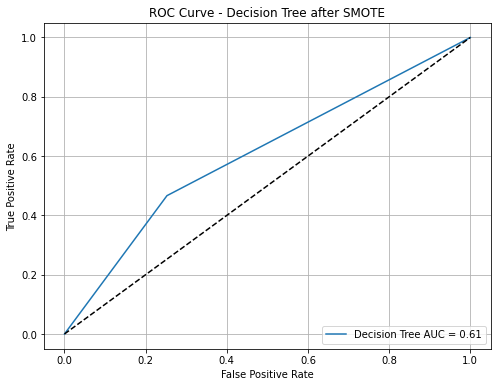

In [89]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_sm, y_train_sm)
y_pred_tree = tree.predict(X_test)
y_probs_tree = tree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs_tree)
auc_score = roc_auc_score(y_test, y_probs_tree)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree after SMOTE')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(tree, params, cv=5, scoring='f1')
grid.fit(X_train, y_train)

best_tree = grid.best_estimator_
y_pred_tree = best_tree.predict(X_test)

print("\nDecision Tree Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      4673
           1       0.61      0.36      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



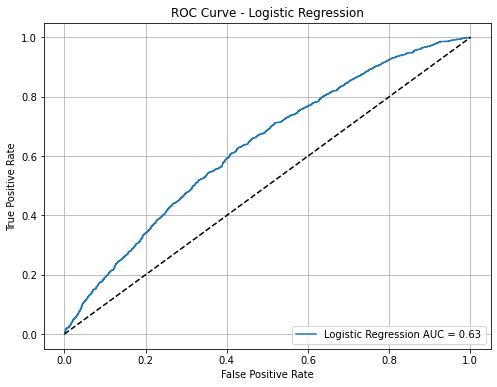

In [83]:
# AUC-ROC Curve for Logistic Regression
y_probs_log = logreg.predict_proba(X_test)[:, 1]  
fpr, tpr, _ = roc_curve(y_test, y_probs_log)
auc_score = roc_auc_score(y_test, y_probs_log)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



### 📈 Step 9: Evaluate Decision Tree Model

Evaluate the decision tree with a confusion matrix and ROC AUC score. This shows how well the model classifies defaults vs non-defaults.

###  Step 10: Visualize the Decision Tree

Plot the top levels of the decision tree to see which features and splits the model uses most in its decisions. This is useful for stakeholder communication.
"""

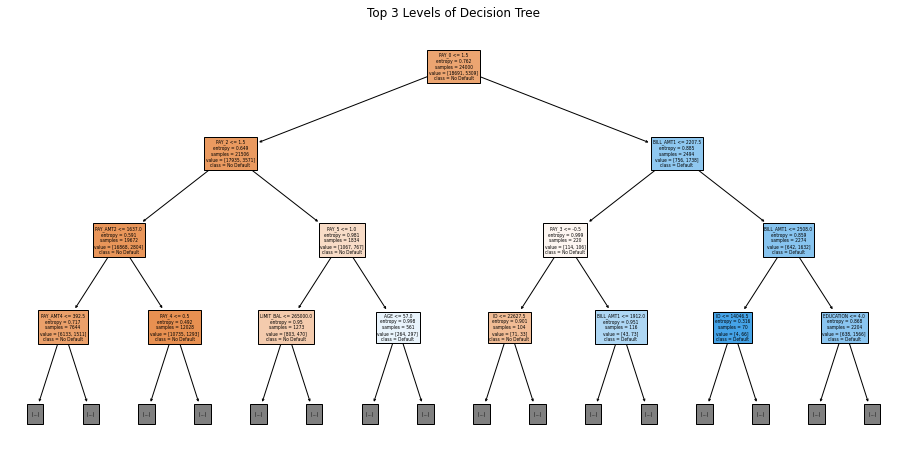

In [ ]:
plt.figure(figsize=(16, 8))
plot_tree(best_tree, filled=True, max_depth=3, feature_names=X.columns, class_names=['No Default', 'Default'])
plt.title("Top 3 Levels of Decision Tree")
plt.show()

# Step 11: Recommendations to Stakeholders

- Clients with low credit limits and inconsistent past payments should be flagged for review.
- Younger clients and those with high monthly bill statements may require stricter approval conditions.
- Incorporate this model into your approval system for early risk identification.
- Update the model quarterly with new data to ensure its relevance.

# Step 12: Study Limitations

- The dataset is based on historical data from Taiwan and may not generalize well globally.
- Categorical variables like EDUCATION and MARRIAGE were grouped manually and may affect model accuracy.
- The model doesn’t include behavioral variables like credit inquiries or recent transactions.
- Logistic Regression may underfit, and Decision Trees may overfit without pruning or ensemble methods.
